In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('riders.csv')

In [3]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
df.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [5]:
df.shape

(115, 2)

In [6]:
df.dtypes

Month                                                                                         object
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114    object
dtype: object

In [7]:
df.columns

Index(['Month', 'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114'], dtype='object')

In [8]:
df.columns = ['Month', 'Riders']

In [9]:
df

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [10]:
df.isna().sum()

Month     0
Riders    0
dtype: int64

In [11]:
df.dtypes

Month     object
Riders    object
dtype: object

In [12]:
df = df[:-1]

In [13]:
df

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394


In [14]:
df['Riders'] = pd.to_numeric(df['Riders'])

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394


In [16]:
df.dtypes

Month     object
Riders     int64
dtype: object

In [17]:
df

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394


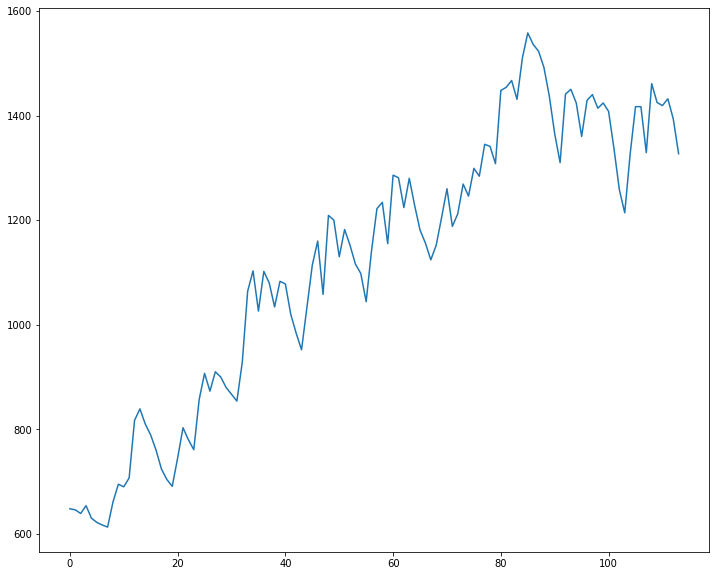

In [18]:
plt.figure(figsize = (12,10))
plt.plot(df['Riders'])

In [22]:
df = df.set_index('Month')

In [23]:
df

,Riders
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630
...,...
1969-02,1425
1969-03,1419
1969-04,1432


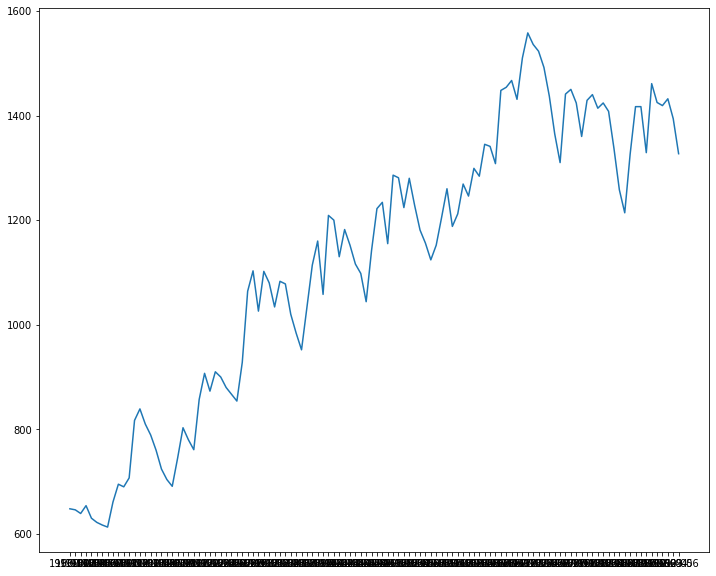

In [25]:
plt.figure(figsize =(12,10))
plt.plot(df)

In [26]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(-1,1))
df = sc.fit_transform(df)

In [29]:
df[:10]

array([[-0.92592593],
       [-0.93015873],
       [-0.94497354],
       [-0.91322751],
       [-0.96402116],
       [-0.98095238],
       [-0.99153439],
       [-1.        ],
       [-0.8984127 ],
       [-0.82645503]])

In [30]:
df.shape

(114, 1)

In [34]:
look_back = 10
dataX, dataY = [],[]
for i in range(len(df)-(look_back)):
    dataX.append(df[i:i+look_back])
    dataY.append(df[i+look_back])

In [35]:
dataX = np.asanyarray(dataX)
dataY = np.asanyarray(dataY)

In [44]:
xtrain = dataX[:90,:,:]
xtest = dataX[90:,:,:]
ytrain = dataY[:90]
ytest = dataY[90:]

In [45]:
xtrain.shape,ytrain.shape

((90, 10, 1), (90, 1))

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM, RepeatVector
from keras.layers import Flatten,Conv1D, MaxPooling1D

In [47]:
model = Sequential()
model.add(Conv1D(filters =256,kernel_size=2, activation='relu', input_shape=(10,1)))
model.add(Conv1D(filters=128, kernel_size=2,activation='relu', input_shape=(10,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(128,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [49]:
history = model.fit(xtrain,ytrain,epochs=500,verbose=1)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 2/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 3/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 4/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 5/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 6/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 7/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 8/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 9/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 10/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 11/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 12/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 13/500
90/90 [=================

90/90 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 101/500
90/90 [==============================] - 0s 2ms/step - loss: 9.0586e-04
Epoch 102/500
90/90 [==============================] - 0s 2ms/step - loss: 6.1348e-04
Epoch 103/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 104/500
90/90 [==============================] - 0s 1ms/step - loss: 7.0169e-04
Epoch 105/500
90/90 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 106/500
90/90 [==============================] - 0s 1ms/step - loss: 5.7061e-04
Epoch 107/500
90/90 [==============================] - 0s 2ms/step - loss: 5.6437e-04
Epoch 108/500
90/90 [==============================] - 0s 2ms/step - loss: 4.8804e-04
Epoch 109/500
90/90 [==============================] - 0s 2ms/step - loss: 3.5780e-04
Epoch 110/500
90/90 [==============================] - 0s 2ms/step - loss: 3.6904e-04
Epoch 111/500
90/90 [==============================] - 0s 2ms/step - loss: 2.543

90/90 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 197/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 198/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 199/500
90/90 [==============================] - 0s 2ms/step - loss: 9.0512e-04
Epoch 200/500
90/90 [==============================] - 0s 2ms/step - loss: 7.5898e-04
Epoch 201/500
90/90 [==============================] - 0s 2ms/step - loss: 4.9866e-04
Epoch 202/500
90/90 [==============================] - 0s 2ms/step - loss: 3.1819e-04
Epoch 203/500
90/90 [==============================] - 0s 1ms/step - loss: 4.1922e-04
Epoch 204/500
90/90 [==============================] - 0s 2ms/step - loss: 3.7930e-04
Epoch 205/500
90/90 [==============================] - 0s 1ms/step - loss: 2.4525e-04
Epoch 206/500
90/90 [==============================] - 0s 1ms/step - loss: 2.0465e-04
Epoch 207/500
90/90 [==============================] - 0s 1ms/step - loss: 1.483

90/90 [==============================] - 0s 2ms/step - loss: 2.1427e-05
Epoch 292/500
90/90 [==============================] - 0s 2ms/step - loss: 2.3805e-05
Epoch 293/500
90/90 [==============================] - 0s 2ms/step - loss: 2.8787e-05
Epoch 294/500
90/90 [==============================] - 0s 2ms/step - loss: 1.6189e-05
Epoch 295/500
90/90 [==============================] - 0s 2ms/step - loss: 2.9528e-05
Epoch 296/500
90/90 [==============================] - 0s 2ms/step - loss: 1.7323e-05
Epoch 297/500
90/90 [==============================] - 0s 2ms/step - loss: 2.4089e-05
Epoch 298/500
90/90 [==============================] - 0s 2ms/step - loss: 2.3255e-05
Epoch 299/500
90/90 [==============================] - 0s 2ms/step - loss: 2.2803e-05
Epoch 300/500
90/90 [==============================] - 0s 2ms/step - loss: 1.2279e-05
Epoch 301/500
90/90 [==============================] - 0s 2ms/step - loss: 9.5703e-06
Epoch 302/500
90/90 [==============================] - 0s 2ms/step -

90/90 [==============================] - 0s 2ms/step - loss: 3.5811e-06
Epoch 387/500
90/90 [==============================] - 0s 2ms/step - loss: 3.7194e-06
Epoch 388/500
90/90 [==============================] - 0s 2ms/step - loss: 3.7208e-06
Epoch 389/500
90/90 [==============================] - 0s 2ms/step - loss: 4.2087e-06
Epoch 390/500
90/90 [==============================] - 0s 2ms/step - loss: 3.4847e-06
Epoch 391/500
90/90 [==============================] - 0s 2ms/step - loss: 3.2744e-06
Epoch 392/500
90/90 [==============================] - 0s 2ms/step - loss: 2.6998e-06
Epoch 393/500
90/90 [==============================] - 0s 2ms/step - loss: 2.7826e-06
Epoch 394/500
90/90 [==============================] - 0s 2ms/step - loss: 5.7795e-06
Epoch 395/500
90/90 [==============================] - 0s 2ms/step - loss: 4.0134e-06
Epoch 396/500
90/90 [==============================] - 0s 1ms/step - loss: 3.6726e-06
Epoch 397/500
90/90 [==============================] - 0s 1ms/step -

90/90 [==============================] - 0s 1ms/step - loss: 6.0852e-04
Epoch 482/500
90/90 [==============================] - 0s 1ms/step - loss: 5.2115e-04
Epoch 483/500
90/90 [==============================] - 0s 2ms/step - loss: 4.6111e-04
Epoch 484/500
90/90 [==============================] - 0s 1ms/step - loss: 6.1790e-04
Epoch 485/500
90/90 [==============================] - 0s 1ms/step - loss: 8.8734e-04
Epoch 486/500
90/90 [==============================] - 0s 1ms/step - loss: 7.4129e-04
Epoch 487/500
90/90 [==============================] - 0s 1ms/step - loss: 6.1002e-04
Epoch 488/500
90/90 [==============================] - 0s 1ms/step - loss: 4.6815e-04
Epoch 489/500
90/90 [==============================] - 0s 1ms/step - loss: 3.6547e-04
Epoch 490/500
90/90 [==============================] - 0s 1ms/step - loss: 3.9206e-04
Epoch 491/500
90/90 [==============================] - 0s 2ms/step - loss: 1.6110e-04
Epoch 492/500
90/90 [==============================] - 0s 1ms/step -

In [50]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)

In [51]:
pred

array([[1442.6871],
       [1406.5599],
       [1381.0961],
       [1328.3374],
       [1373.4958],
       [1377.5089],
       [1359.5311],
       [1304.4655],
       [1402.722 ],
       [1486.5902],
       [1468.4921],
       [1435.751 ],
       [1482.1033],
       [1458.008 ]], dtype=float32)

In [52]:
ytest = sc.inverse_transform(ytest)

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
C:\Users\siddh\Anaconda3\lib\site-packag

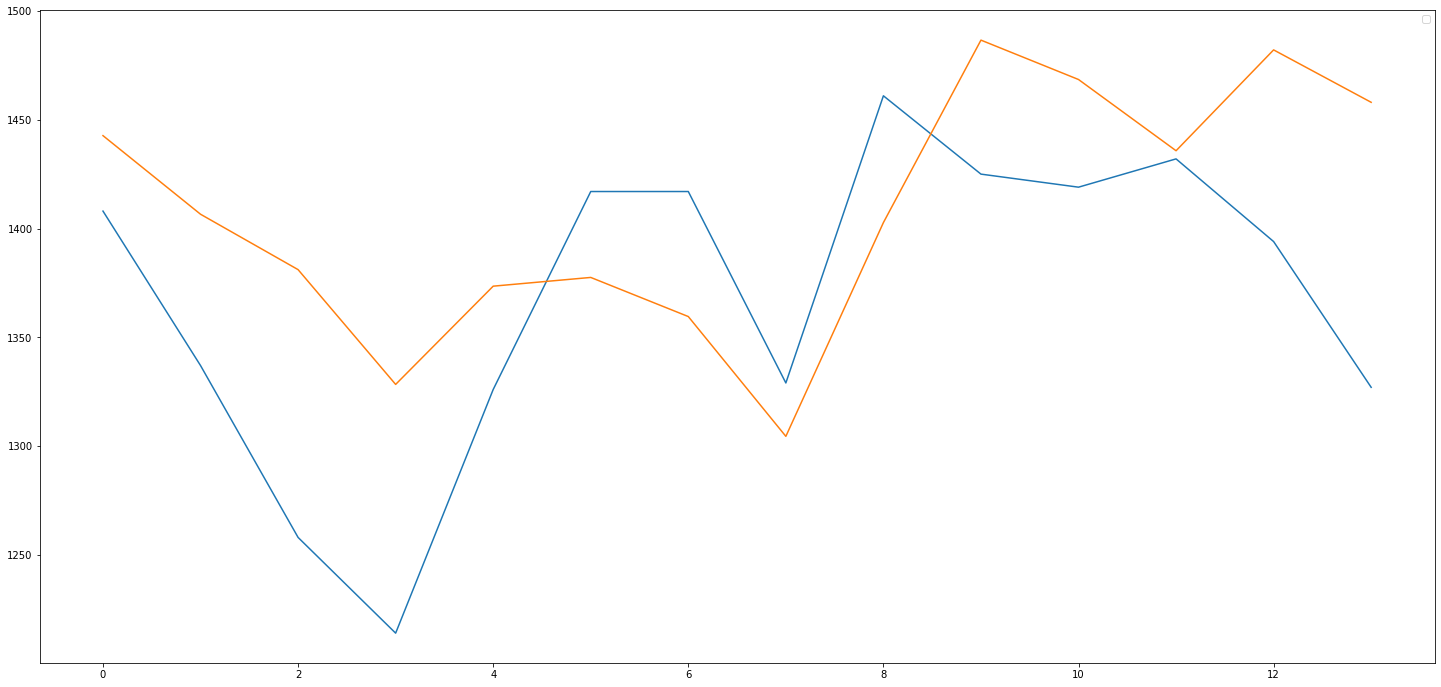

In [53]:
plt.figure(figsize = (25,12))
plt.plot(ytest)
plt.plot(pred)
plt.legend('Test', 'Predicted')
plt.show()